# Verzeo Major group Project - odi

NAME - ROHAN RAHUL PATIL


COURSE - DATA SCIENCE


Email - rohanrp7777@gmail.com


BATCH - B4

## Loading Dataset

In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("odi.csv")

## Using 'Groupsby' operation to find the average number of runs, scored by each country. 

In [3]:
team_avg={}
for team,frame in df.groupby("bat_team"):
    team_total=sum(frame["total"])
    avg=team_total/len(frame)
    print(team+"  : "+str(avg))
    team_avg[team]=avg

Afghanistan  : 231.29468535166578
Asia XI  : 328.3961456102784
Australia  : 274.58385328460645
Bangladesh  : 232.17477025898077
Bermuda  : 189.2697963800905
Canada  : 198.4609310058188
England  : 266.2615757274619
Hong Kong  : 226.45668629100084
India  : 277.2617317182593
Ireland  : 228.5720547217426
Kenya  : 183.18817204301075
Netherlands  : 202.668044077135
New Zealand  : 267.91124966834707
Pakistan  : 256.9619053635732
Papua New Guinea  : 201.0
Scotland  : 224.37231903485255
South Africa  : 282.7383768224767
Sri Lanka  : 254.554023418328
United Arab Emirates  : 224.05782652043868
West Indies  : 237.37139749864056
Zimbabwe  : 206.44633835402993


In [4]:
avg_series=pd.Series(team_avg)

In [5]:
avg_df=pd.DataFrame(avg_series).reset_index().rename(columns={'index':'Team',0:'average runs'})

In [6]:
avg_df

,Team,average runs
0,Afghanistan,231.294685
1,Asia XI,328.396146
2,Australia,274.583853
3,Bangladesh,232.174770
4,Bermuda,189.269796
5,Canada,198.460931
6,England,266.261576
7,Hong Kong,226.456686
8,India,277.261732
9,Ireland,228.572055


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Representing it in a Bar graph 

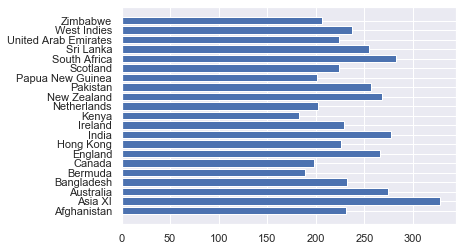

<Figure size 5760x4320 with 0 Axes>

In [8]:
plt.barh(avg_df["Team"],avg_df["average runs"],align='center',)
plt.figure(figsize=(80,60))
plt.show()

## Finding Null values

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350899 entries, 0 to 350898
Data columns (total 15 columns):
mid               350899 non-null int64
date              350899 non-null object
venue             350899 non-null object
bat_team          350899 non-null object
bowl_team         350899 non-null object
batsman           350899 non-null object
bowler            350899 non-null object
runs              350899 non-null int64
wickets           350899 non-null int64
overs             350899 non-null float64
runs_last_5       350899 non-null int64
wickets_last_5    350899 non-null int64
striker           350899 non-null int64
non-striker       350899 non-null int64
total             350899 non-null int64
dtypes: float64(1), int64(8), object(6)
memory usage: 40.2+ MB


There are no null values.

# Dropping columns that do not contribute much to the Total

In [10]:
df=df.drop(["mid"],axis=1)

Date and Mid represents the same information. So, we can drop one of them.

In [11]:
df

,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,0,0,0.1,0,0,0,0,301
1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,0,0,0.2,0,0,0,0,301
2,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,4,0,0.3,4,0,0,0,301
3,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,6,0,0.4,6,0,0,0,301
4,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,6,0,0.5,6,0,0,0,301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350894,2017-07-10,Mahinda Rajapaksa International Cricket Stadiu...,Sri Lanka,Zimbabwe,DAS Gunaratne,TL Chatara,201,8,49.2,39,0,59,18,203
350895,2017-07-10,Mahinda Rajapaksa International Cricket Stadiu...,Sri Lanka,Zimbabwe,DAS Gunaratne,TL Chatara,201,8,49.3,39,0,59,18,203
350896,2017-07-10,Mahinda Rajapaksa International Cricket Stadiu...,Sri Lanka,Zimbabwe,DAS Gunaratne,TL Chatara,201,8,49.4,38,0,59,18,203
350897,2017-07-10,Mahinda Rajapaksa International Cricket Stadiu...,Sri Lanka,Zimbabwe,DAS Gunaratne,TL Chatara,202,8,49.5,38,0,59,18,203


In [12]:
import datetime as dt
df["date"]=pd.to_datetime(df["date"])
df["date"]=df["date"].map(dt.datetime.toordinal)

In [13]:
df

,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,732475,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,0,0,0.1,0,0,0,0,301
1,732475,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,0,0,0.2,0,0,0,0,301
2,732475,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,4,0,0.3,4,0,0,0,301
3,732475,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,6,0,0.4,6,0,0,0,301
4,732475,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,6,0,0.5,6,0,0,0,301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350894,736520,Mahinda Rajapaksa International Cricket Stadiu...,Sri Lanka,Zimbabwe,DAS Gunaratne,TL Chatara,201,8,49.2,39,0,59,18,203
350895,736520,Mahinda Rajapaksa International Cricket Stadiu...,Sri Lanka,Zimbabwe,DAS Gunaratne,TL Chatara,201,8,49.3,39,0,59,18,203
350896,736520,Mahinda Rajapaksa International Cricket Stadiu...,Sri Lanka,Zimbabwe,DAS Gunaratne,TL Chatara,201,8,49.4,38,0,59,18,203
350897,736520,Mahinda Rajapaksa International Cricket Stadiu...,Sri Lanka,Zimbabwe,DAS Gunaratne,TL Chatara,202,8,49.5,38,0,59,18,203


### Let's check weather date is related to match total by checking only for each match instead of checking for each ball in given data

In [14]:
df_50=df[df["overs"]==0.1]
#these way we took total and date for each match only for co-relation between total and date

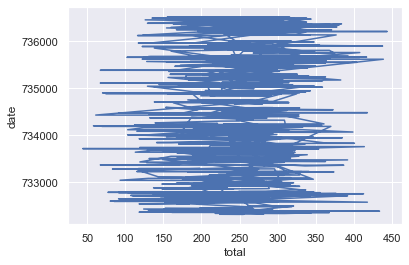

In [15]:
plt.plot(df_50["total"],df_50["date"])
plt.xlabel("total")
plt.ylabel("date")
df_50["total"].corr(df_50["date"])
#as pearson coefficient for date and total is less so better to drop date column
df=df.drop(["date"],axis=1)

Batsman and Bowler at that ball(over) in connection to the total runs..seems far fetched. And it will decrease the dummy columns while One-Hot encoding drastically if we drop them.


In [16]:
df=df.drop(["batsman","bowler"],axis=1)

## Venue check

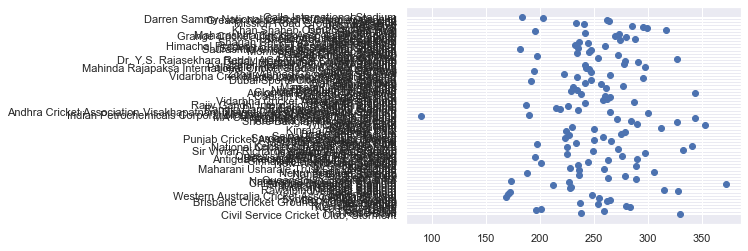

In [17]:
venue_avg=df_50.groupby("venue").total.mean()
venues=df_50["venue"].unique()
plt.scatter(venue_avg,venues)

#some venues have high average so we cannot drop it

# Feature Scaling using MinMaxScaler

In [18]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler(feature_range=(0,1))
runs=pd.DataFrame(df["runs"])
wickets=pd.DataFrame(df["wickets"])
overs=pd.DataFrame(df["overs"])
runs_last=pd.DataFrame(df["runs_last_5"])
wickets_last=pd.DataFrame(df["wickets_last_5"])
striker=pd.DataFrame(df["striker"])
non_striker=pd.DataFrame(df["non-striker"])
df["runs"]=scalar.fit_transform(runs)
df["wickets"]=scalar.fit_transform(wickets)
df["overs"]=scalar.fit_transform(overs)
df["runs_last_5"]=scalar.fit_transform(runs_last)
df["wickets_last_5"]=scalar.fit_transform(wickets_last)
df["striker"]=scalar.fit_transform(striker)
df["non-striker"]=scalar.fit_transform(non_striker)
df

,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,"Civil Service Cricket Club, Stormont",England,Ireland,0.000000,0.0,0.002016,0.000000,0.0,0.000000,0.000000,301
1,"Civil Service Cricket Club, Stormont",England,Ireland,0.000000,0.0,0.004032,0.000000,0.0,0.000000,0.000000,301
2,"Civil Service Cricket Club, Stormont",England,Ireland,0.009009,0.0,0.006048,0.039604,0.0,0.000000,0.000000,301
3,"Civil Service Cricket Club, Stormont",England,Ireland,0.013514,0.0,0.008065,0.059406,0.0,0.000000,0.000000,301
4,"Civil Service Cricket Club, Stormont",England,Ireland,0.013514,0.0,0.010081,0.059406,0.0,0.000000,0.000000,301
...,...,...,...,...,...,...,...,...,...,...,...
350894,Mahinda Rajapaksa International Cricket Stadiu...,Sri Lanka,Zimbabwe,0.452703,0.8,0.991935,0.386139,0.0,0.223485,0.120805,203
350895,Mahinda Rajapaksa International Cricket Stadiu...,Sri Lanka,Zimbabwe,0.452703,0.8,0.993952,0.386139,0.0,0.223485,0.120805,203
350896,Mahinda Rajapaksa International Cricket Stadiu...,Sri Lanka,Zimbabwe,0.452703,0.8,0.995968,0.376238,0.0,0.223485,0.120805,203
350897,Mahinda Rajapaksa International Cricket Stadiu...,Sri Lanka,Zimbabwe,0.454955,0.8,0.997984,0.376238,0.0,0.223485,0.120805,203


# One-Hot encoding

In [19]:
df_new=pd.get_dummies(df,columns=["bat_team","bowl_team","venue"])
df2=df.drop(["venue"],axis=1)
df_predic=pd.get_dummies(df2,columns=["bat_team","bowl_team"]) #for predictions on a new dataset

In [20]:
df_new

,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total,bat_team_Afghanistan,bat_team_Asia XI,...,venue_Vidarbha Cricket Association Ground,"venue_Vidarbha Cricket Association Stadium, Jamtha",venue_Wankhede Stadium,"venue_Warner Park, Basseterre",venue_Western Australia Cricket Association Ground,venue_Westpac Stadium,venue_Willowmoore Park,"venue_Windsor Park, Roseau",venue_Zahur Ahmed Chowdhury Stadium,venue_Zohur Ahmed Chowdhury Stadium
0,0.000000,0.0,0.002016,0.000000,0.0,0.000000,0.000000,301,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.000000,0.0,0.004032,0.000000,0.0,0.000000,0.000000,301,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.009009,0.0,0.006048,0.039604,0.0,0.000000,0.000000,301,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.013514,0.0,0.008065,0.059406,0.0,0.000000,0.000000,301,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.013514,0.0,0.010081,0.059406,0.0,0.000000,0.000000,301,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350894,0.452703,0.8,0.991935,0.386139,0.0,0.223485,0.120805,203,0,0,...,0,0,0,0,0,0,0,0,0,0
350895,0.452703,0.8,0.993952,0.386139,0.0,0.223485,0.120805,203,0,0,...,0,0,0,0,0,0,0,0,0,0
350896,0.452703,0.8,0.995968,0.376238,0.0,0.223485,0.120805,203,0,0,...,0,0,0,0,0,0,0,0,0,0
350897,0.454955,0.8,0.997984,0.376238,0.0,0.223485,0.120805,203,0,0,...,0,0,0,0,0,0,0,0,0,0


## Training data

In [21]:
X=df_new.drop(["total"],axis=1)
Y=df_new["total"]
X1=df_predic.drop(["total"],axis=1)   #for predictions on a new dataset
Y1=df_predic["total"]

X1

,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,bat_team_Afghanistan,bat_team_Asia XI,bat_team_Australia,...,bowl_team_Netherlands,bowl_team_New Zealand,bowl_team_Pakistan,bowl_team_Papua New Guinea,bowl_team_Scotland,bowl_team_South Africa,bowl_team_Sri Lanka,bowl_team_United Arab Emirates,bowl_team_West Indies,bowl_team_Zimbabwe
0,0.000000,0.0,0.002016,0.000000,0.0,0.000000,0.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.000000,0.0,0.004032,0.000000,0.0,0.000000,0.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.009009,0.0,0.006048,0.039604,0.0,0.000000,0.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.013514,0.0,0.008065,0.059406,0.0,0.000000,0.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.013514,0.0,0.010081,0.059406,0.0,0.000000,0.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350894,0.452703,0.8,0.991935,0.386139,0.0,0.223485,0.120805,0,0,0,...,0,0,0,0,0,0,0,0,0,1
350895,0.452703,0.8,0.993952,0.386139,0.0,0.223485,0.120805,0,0,0,...,0,0,0,0,0,0,0,0,0,1
350896,0.452703,0.8,0.995968,0.376238,0.0,0.223485,0.120805,0,0,0,...,0,0,0,0,0,0,0,0,0,1
350897,0.454955,0.8,0.997984,0.376238,0.0,0.223485,0.120805,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# Train-Test-Split

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33,random_state=50)
X_train_new,X_test_new,Y_train_new,Y_test_new=train_test_split(X1,Y1,test_size=0.33,random_state=50) #for predictions on a new dataset

# Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression
linear=LinearRegression()
linear.fit(X_train,Y_train)
y_pred=linear.predict(X_test)
y_pred

array([157.34375  , 356.546875 , 171.8984375, ..., 156.7265625,
       284.4453125, 280.2734375])

In [24]:
linear.score(X_test,Y_test)

0.620832685705665

# Decision Tree Regression

In [25]:
from sklearn.tree import DecisionTreeRegressor
decision=DecisionTreeRegressor()
decision.fit(X_train,Y_train)
y_pred2=decision.predict(X_test)
y_pred2

array([183., 367., 189., ..., 162., 275., 385.])

In [26]:
decision.score(X_test,Y_test)

0.9543166301918735

In [27]:
#X_test.columns

# Random Forest Regression

In [28]:
from sklearn.ensemble import RandomForestRegressor
random=RandomForestRegressor(random_state=15325)
random.fit(X_train,Y_train)
y_pred3=random.predict(X_test)
y_pred3

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([183. , 369.1, 189. , ..., 138.9, 276.1, 364.9])

In [29]:
random.score(X_test,Y_test)

0.9759607466139841

### Random Forest Regression has an accuracy of 97.59% which is the highest

## Creation of the Dataset

Since we have used feature scaling, we have to fill the dataset keeping in mind that the features are scaled. Scaled values in MinMaxScaler are calculated by dividing that value with the difference in maximum and minimum of that value. Min, Max values of the scaled columns are : <br>
runs:(0,444),wickets:(0,10),overs:(0,49.6),runs_last_5:(0,101),wickets_last_5:(0,7),striker:(0,264),non-striker:(0,149)<br>

Let's create a dataset using the match scenarios described below


Match Scenarios :<br>
    1. India vs Pakistan : 
      India is batting first and the score stands 286-4 in 42 overs. Runs in the last five overs are 40 and the wickets in           the last five overs are 2. Striker has made 82 and the non-striker has made 41.
    2. Australia vs England :    
      Australia is batting first and the score stands 244-6 in 38 overs. Runs in the last five overs are 45 and the wickets          in the last five overs are 3. Striker has made 44 and the non-striker has made 18.
    3. West Indies vs Newzealand :   
      Newzealand is batting first and the score stands 260-8 in 36 overs. Runs in the last five overs are 45 and the wickets          in the last five overs are 4. Striker has made 8 and the non-striker has made 6.      

### Final Dataset

In [30]:
pred_test=pd.read_csv("odi_test.csv")
pred_test

,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,bat_team_Afghanistan,bat_team_AsiaXI,bat_team_Australia,...,bowl_team_Netherlands,bowl_team_New Zealand,bowl_team_Pakistan,bowl_team_Papua New Guinea,bowl_team_Scotland,bowl_team_South Africa,bowl_team_Sri Lanka,bowl_team_United Arab Emirates,bowl_team_West Indies,bowl_team_Zimbabwe
0,0.6441,0.4,0.8387,0.3960,0.2857,0.3106,0.2751,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0.5495,0.6,0.7580,0.4455,0.4285,0.1666,0.1208,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0.5855,0.8,0.7177,0.4455,0.5714,0.0303,0.0402,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## Prediction on a new dataset

A new dataset has been created in order to predict on it. As mentioned in the comments on some of the code above, we are predicting on a model where we don't include venue in the features. The reason is that, by including venue column the created dataset has to have 185 columns. Creating such a dataset is a tedious task and hence we are predicting by removing venue, which requires 49 columns. Since, Random Forest Regression has the highest accuracy, let's predict using that model

In [31]:
from sklearn.ensemble import RandomForestRegressor
random=RandomForestRegressor(random_state=15325)
random.fit(X_train_new,Y_train_new)
Total=random.predict(pred_test)
Total

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([380.8, 308.8, 326.6])

Let's round the Totals to their nearest integers.

## Final Totals of the aforementioned matches 

1. India ends up with a total of 381
2. Australia puts up 309 on the board
3. NewZealand finishes on 327